<a href="https://colab.research.google.com/github/yuguerten/British_Airways_Reviews/blob/master/sentiment_analysis_of_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('British_Airways_reviews.csv', encoding='utf-8', lineterminator='\n')

In [2]:
data.head()

,Review
0,this was our first flight with british airway...
1,not verified beware ba dont provide any refun...
2,not verified all of our flights were fine in ...
3,i was going to fly to frankfurt from glasgow...
4,once again a terrible business class experien...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1860 non-null   object
dtypes: object(1)
memory usage: 14.7+ KB


In [4]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Sentiment Analysis**

In [8]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [11]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

data['Sentiment'] = data['Review'].apply(vadersentimentanalysis)


def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
data['Analysis'] = data['Sentiment'].apply(vader_analysis)
data.head()

,Review,Sentiment,Analysis
0,this was our first flight with british airway...,0.9839,Positive
1,not verified beware ba dont provide any refun...,0.5435,Positive
2,not verified all of our flights were fine in ...,-0.4588,Negative
3,i was going to fly to frankfurt from glasgow...,-0.9751,Negative
4,once again a terrible business class experien...,-0.9465,Negative


In [13]:
analysis = data['Analysis'].value_counts()
analysis

Positive    930
Negative    759
Neutral     171
Name: Analysis, dtype: int64

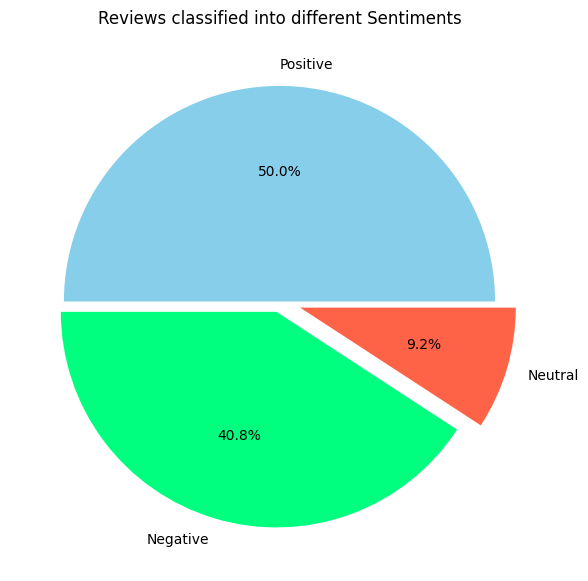

In [14]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,2)
plt.title("Reviews classified into different Sentiments")
plt.pie(analysis.values, labels = analysis.index, explode = (0, 0.05, 0.1), autopct='%1.1f%%', shadow=False , colors=("skyblue", "springgreen", "tomato"))
plt.show()

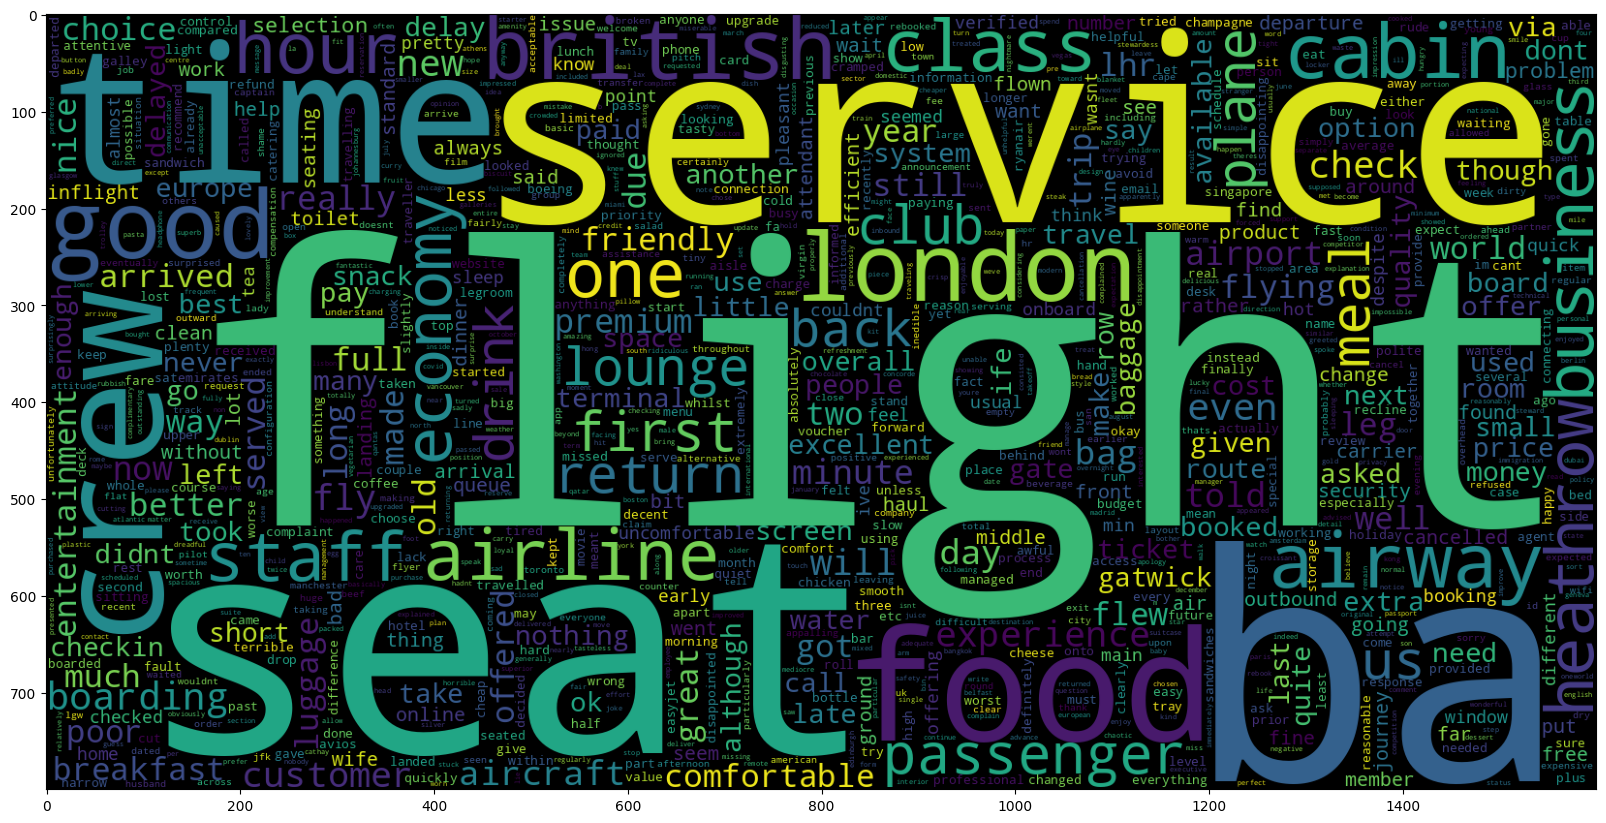

In [6]:
from wordcloud import WordCloud
data_neg = data['Review']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)